In [1]:
import pickle
import os
import networkx as nx
import matplotlib.pyplot as plt
import pickle

In [2]:
i=0
connect_path = "../../../connection_pairs_"+str(i)+".pkl"  
feat_path = "../../../features_"+str(i)+".pkl"
label_path = "../../../labels_"+str(i)+".pkl"

In [3]:
with open(connect_path, "rb") as file:
    connection_pairs = pickle.load(file)
with open(feat_path, "rb") as file:
    features = pickle.load(file)
with open(label_path, "rb") as file:
    labels = pickle.load(file)

In [4]:
labels.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.int32)

In [5]:
def plot_graph(edges, labels, bs):

    num_nodes = len(edges)

    # for i in range(num_nodes):
    #     for j in range(i + 1, num_nodes):  # Exclude diagonal and symmetric entries
    #         if adjacency_matrix[i, j] != 0:
    #             edges.append((i, j))
    ed= [(edge[0], edge[1]) for edge in edges]
    #labels = {0: '0', 1: '1', 2: '2', 3: '3', 4:'4', 5:'5', 6:'6'}
    labels_color= {0:'blue', 1:'navy', 2:'green',3:'yellow', 4:'orange', 5: 'navy',
                  6: 'pink', 7:'purple', 8:'grey', 9:'salmon'}
    graph = nx.Graph(ed)
    node_labels = [labels[node].item() for node in graph.nodes()]
    node_colors = [labels_color[node_label] for node_label in node_labels]
    print(node_colors)
    pos = nx.random_layout(graph)  # Specify the layout for node positions
    #pos = nx.planar_layout(graph)
    nx.draw_networkx(graph, pos=pos, node_color=node_colors, with_labels=False)
    plt.show()
    # plt.savefig("../../graph_bs_"+str(bs)+".png")
    # plt.close()


['blue', 'navy', 'navy', 'yellow', 'navy', 'navy', 'navy', 'navy', 'blue', 'orange', 'yellow']


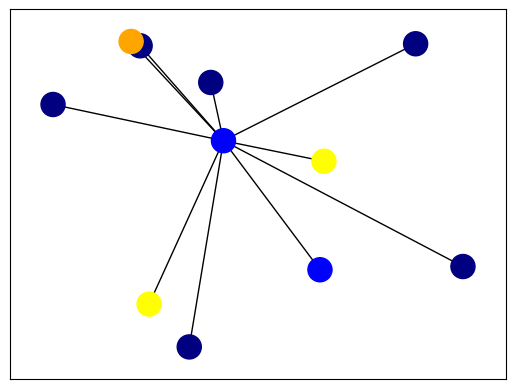

In [8]:
plot_graph(connection_pairs[:10], labels, i)

In [7]:
labels

tensor([[0],
        [2],
        [6],
        [9],
        [8],
        [7],
        [5],
        [4],
        [1],
        [2],
        [3],
        [4],
        [0],
        [4],
        [7],
        [5],
        [1],
        [1],
        [6],
        [1],
        [3],
        [7],
        [3],
        [8],
        [3],
        [4],
        [3],
        [6],
        [4],
        [8],
        [9],
        [8],
        [1],
        [8],
        [1],
        [0],
        [6],
        [4],
        [1],
        [4],
        [3],
        [1],
        [9],
        [7],
        [7],
        [5],
        [6],
        [7],
        [3],
        [4],
        [1],
        [2],
        [4],
        [5],
        [5],
        [4],
        [4],
        [1],
        [4],
        [6],
        [1],
        [1],
        [0],
        [7],
        [2],
        [7],
        [8],
        [1],
        [3],
        [8],
        [6],
        [9],
        [5],
        [5],
        [5],
        [3],
        [3],

In [9]:
connection_pairs
    

[[0, 389],
 [0, 144],
 [0, 297],
 [0, 92],
 [0, 376],
 [0, 248],
 [0, 334],
 [0, 456],
 [0, 497],
 [0, 251],
 [1, 480],
 [1, 53],
 [1, 216],
 [1, 278],
 [1, 231],
 [1, 340],
 [1, 238],
 [1, 357],
 [1, 12],
 [1, 147],
 [2, 161],
 [2, 189],
 [2, 462],
 [2, 223],
 [2, 402],
 [2, 143],
 [2, 417],
 [2, 270],
 [2, 207],
 [2, 233],
 [3, 181],
 [3, 19],
 [3, 455],
 [3, 321],
 [3, 249],
 [3, 65],
 [3, 105],
 [3, 476],
 [3, 498],
 [3, 432],
 [4, 37],
 [4, 357],
 [4, 480],
 [4, 403],
 [4, 280],
 [4, 107],
 [4, 239],
 [4, 293],
 [4, 97],
 [4, 328],
 [5, 312],
 [5, 101],
 [5, 305],
 [5, 395],
 [5, 387],
 [5, 201],
 [5, 228],
 [5, 347],
 [5, 279],
 [5, 405],
 [6, 452],
 [6, 94],
 [6, 418],
 [6, 181],
 [6, 224],
 [6, 487],
 [6, 263],
 [6, 321],
 [6, 19],
 [6, 65],
 [7, 387],
 [7, 201],
 [7, 395],
 [7, 482],
 [7, 45],
 [7, 341],
 [7, 88],
 [7, 414],
 [7, 367],
 [7, 280],
 [8, 198],
 [8, 436],
 [8, 387],
 [8, 461],
 [8, 347],
 [8, 368],
 [8, 359],
 [8, 298],
 [8, 362],
 [8, 312],
 [9, 275],
 [9, 137],


In [22]:
import matplotlib.pyplot as plt

def visualize_per_node_connections(features, connections, labels, start):

    plt.figure(figsize=(15, 10))
    plt.subplot(3, 4, 1)
    plt.imshow(features[connections[0][0], 0, :, :])
    plt.title('Node')

    for i in range(0, 10):
        plt.subplot(3, 4, i + 2)
        connected_to_idx = connections[i][1]
        plt.imshow(features[connected_to_idx, 0, :, :])
        plt.title(f'Connected to {connected_to_idx} Label_{labels[connected_to_idx].item()}')

    plt.show()


IndexError: too many indices for tensor of dimension 2

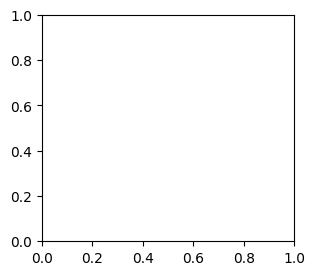

In [23]:
visualize_per_node_connections(features, connection_pairs[:10], labels, 0)